In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import plot

In [2]:
def plot_training(tests, ax):
    for test in tests:
        df = pd.read_csv(plot.get_test(test, data="summary"))
        ax.plot(df["meta_loss"], label=plot.get_name(test))
    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.legend()

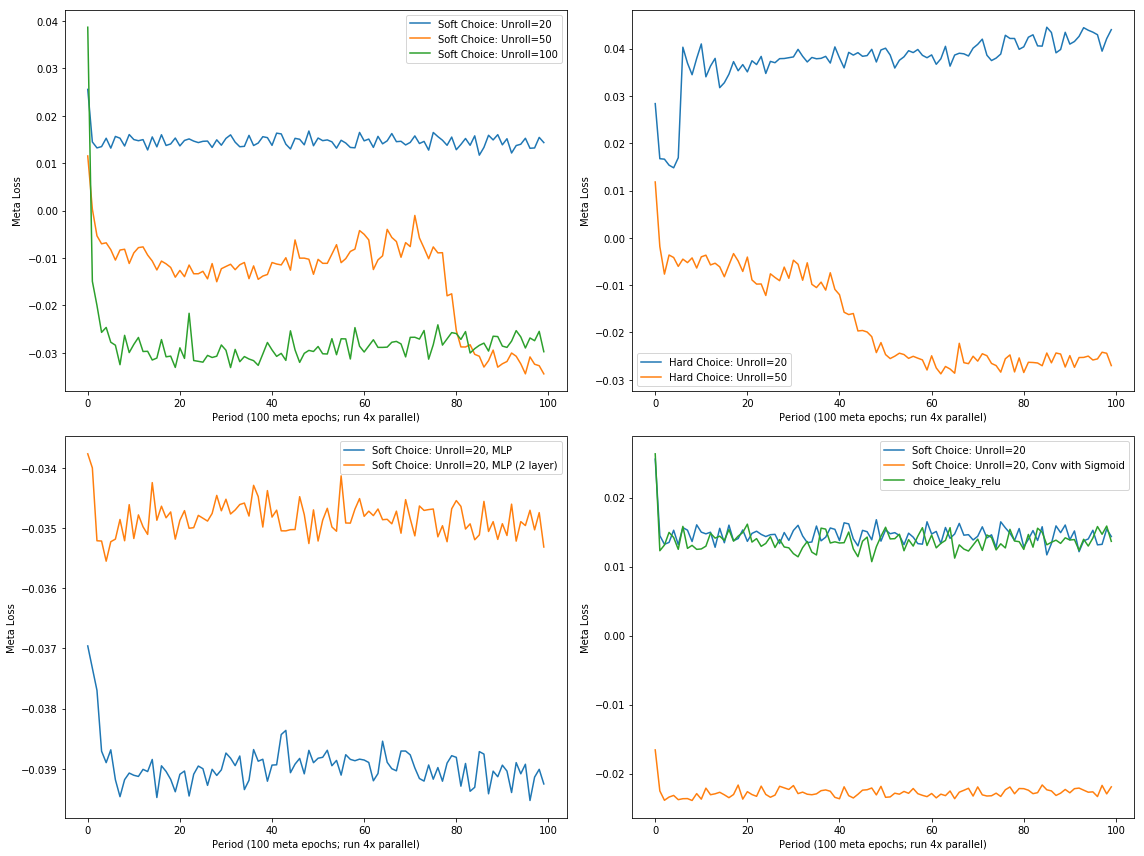

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plot_training(["choice_20", "choice_50", "choice_100"], axs[0][0])
plot_training(["choice_hard", "choice_hard_50"], axs[0][1])
plot_training(["choice_mlp", "choice_mlp_deeper"], axs[1][0])
plot_training(["choice_20", "choice_sigmoid", "choice_leaky_relu"], axs[1][1])
fig.tight_layout()